In [5]:
import numpy as np
import matplotlib.pyplot as plt

filename_list = ['fake2_fake2_fake2_fake2_0V_fake2_fake2.txt', 'fake2_fake2_fake2_fake2_10V_fake2_fake2.txt', 
         'fake2_fake2_fake2_fake2_20V_fake2_fake2.txt', 'fake2_fake2_fake2_fake2_30V_fake2_fake2.txt', 
         'fake2_fake2_fake2_fake2_40V_fake2_fake2.txt', 'fake2_fake2_fake2_fake2_50V_fake2_fake2.txt', 
         'fake_fake_fake_fake_60V_fake_fake.txt', 'fake_fake_fake_fake_70V_fake_fake.txt']

datastore = {}
for filename in filename_list:
    with open (filename, 'r') as f:
        filenameparts = filename.split('_')
        voltage = filenameparts[4].replace('V', '')
        voltage = int(voltage)
        arrtime = []
        intensity = []
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(float(arrtime_intensity[1]))         
            pairs = list(zip(arrtime, intensity))
        datastore[voltage] = pairs

In [6]:
arrts_for2d = []
intens_for2d = []
volts_for2d = []

for k, pair in datastore.items():
    for i in pair:
        arrts_for2d.append(i[0])
        intens_for2d.append(i[1])
        volts_for2d.append(k)
                

(100, 100)


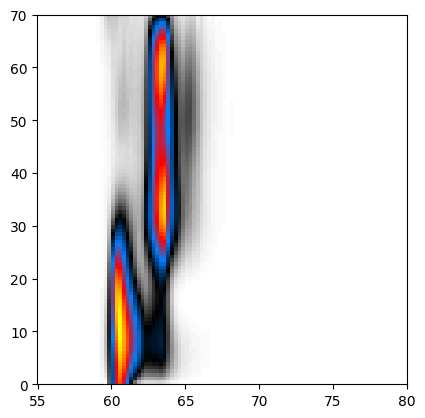

In [7]:
from scipy.interpolate import interp2d, RectBivariateSpline
from matplotlib.colors import LinearSegmentedColormap

X2d = np.array(sorted(set(arrts_for2d))) #flat list
Y2d = np.array(sorted(set(volts_for2d))) #flat list 0 to 70 once
Z2d = np.array(intens_for2d)
Z2d = Z2d.reshape(len(Y2d), len(X2d)).T

#interp_func = interp2d(X2d, Y2d, Z2d, kind='cubic', fill_value=0.0)
interp_func = RectBivariateSpline(X2d, Y2d, Z2d, bbox=[None, None, None, None], kx=3, ky=3, s=0)

X_max = 80
X_min = X2d.min()
Y_min = 0
Y_max = 70

n_smooth = 100

X2d_plot = np.linspace(X_min, X_max, n_smooth)
Y2d_plot = np.linspace(Y_min, Y_max, n_smooth) 

Intens2d_plot = interp_func(X2d_plot, Y2d_plot).T
Intens2d_plot = np.clip(Intens2d_plot, a_min = 0, a_max = None)

#Intens2d_plot = interp_func(X2d_plot, Y2d_plot)
print(Intens2d_plot.shape)

#density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF','#000080','#0080FF'], N=256)
density_colormap = LinearSegmentedColormap.from_list(name='density', colors=['#FFFFFF', '#000000','#0080FF','#FF0000','#FFFF00'], N=256)

fig, ax = plt.subplots()
x_range = (X_min, X_max) #min and max, effectively, cos it's sorted
y_range = (Y_min, Y_max)

aspect = (x_range[1] - x_range[0])/(y_range[1] - y_range[0])

#Intens2d_plot = np.clip(Intens2d_plot, 0.0, None)

ax.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=x_range + y_range, aspect=aspect, vmin=0.0)
plt.show()

In [8]:
Volts_new = Y2d_plot # np.linspace(0, 70, 200)

n,m = Intens2d_plot.shape

x_smootharrT_coords = []
y_smoothV_coords = []
smooth_intensities = []


for i in range(n):
    for j in range(m):
        intensity_value = int(Intens2d_plot[j,i])
        x_smootharrT_coords.append(X2d_plot[i])        
        y_smoothV_coords.append(Volts_new[j])
        smooth_intensities.append(intensity_value)
print(len(x_smootharrT_coords)) #40,000
print(len(y_smoothV_coords)) #40,000 i.e. 200*200
print(len(smooth_intensities)) #40,000 i.e. 200*200

smoothxycoords = list(zip(x_smootharrT_coords, y_smoothV_coords))
smoothxycoords = np.array(smoothxycoords)
smooth_intensities = np.array(smooth_intensities)

print(smoothxycoords.min(axis=0), smoothxycoords.max(axis=0))

10000
10000
10000
[54.982  0.   ] [80. 70.]


[1] Improvement: 2195980.0117602944	Time (s): 0.01197
[2] Improvement: 1230944.5076659918	Time (s): 0.01297
[3] Improvement: 1165655.495346725	Time (s): 0.01197
[4] Improvement: 1298882.95883888	Time (s): 0.01197
[5] Improvement: 1438973.9478141665	Time (s): 0.01296
[6] Improvement: 1463873.9501877427	Time (s): 0.01297
[7] Improvement: 1307352.145275414	Time (s): 0.012
[8] Improvement: 937321.9683558941	Time (s): 0.01198
[9] Improvement: 708500.8423209786	Time (s): 0.01296
[10] Improvement: 330137.24922186136	Time (s): 0.01492
[11] Improvement: 241895.69321995974	Time (s): 0.01197
[12] Improvement: 181637.66094779968	Time (s): 0.01197
[13] Improvement: 139395.12391340733	Time (s): 0.01197
[14] Improvement: 109414.99339407682	Time (s): 0.01197
[15] Improvement: 87892.89932858944	Time (s): 0.01197
[16] Improvement: 72229.22606414557	Time (s): 0.01197
[17] Improvement: 60530.88347154856	Time (s): 0.01197
[18] Improvement: 51708.14542400837	Time (s): 0.01197
[19] Improvement: 44920.6065529

[167] Improvement: 833.2030683159828	Time (s): 0.01393
[168] Improvement: 826.3811559677124	Time (s): 0.016
[169] Improvement: 819.6864469647408	Time (s): 0.01296
[170] Improvement: 813.1163984537125	Time (s): 0.01193
[171] Improvement: 806.6685317754745	Time (s): 0.01399
[172] Improvement: 800.3404548168182	Time (s): 0.01298
[173] Improvement: 794.1298381090164	Time (s): 0.01293
[174] Improvement: 788.0344090461731	Time (s): 0.013
[175] Improvement: 782.0519739985466	Time (s): 0.01193
[176] Improvement: 776.1803839206696	Time (s): 0.01301
[177] Improvement: 770.4175540208817	Time (s): 0.01192
[178] Improvement: 764.761457324028	Time (s): 0.01197
[179] Improvement: 759.2101177573204	Time (s): 0.01297
[180] Improvement: 753.7616062760353	Time (s): 0.01297
[181] Improvement: 748.4140521883965	Time (s): 0.01396
[182] Improvement: 743.1656203866005	Time (s): 0.01297
[183] Improvement: 738.0145403146744	Time (s): 0.01396
[184] Improvement: 732.9590630531311	Time (s): 0.01466
[185] Improveme

[326] Improvement: 532.498576760292	Time (s): 0.015
[327] Improvement: 532.9870764613152	Time (s): 0.01392
[328] Improvement: 533.4874259233475	Time (s): 0.01297
[329] Improvement: 533.9993633031845	Time (s): 0.01197
[330] Improvement: 534.5226274728775	Time (s): 0.01201
[331] Improvement: 535.0569493770599	Time (s): 0.01292
[332] Improvement: 535.6020589470863	Time (s): 0.01299
[333] Improvement: 536.1576902866364	Time (s): 0.01197
[334] Improvement: 536.7235628962517	Time (s): 0.01297
[335] Improvement: 537.2994061112404	Time (s): 0.01197
[336] Improvement: 537.8849314451218	Time (s): 0.01297
[337] Improvement: 538.4798639416695	Time (s): 0.01197
[338] Improvement: 539.0839138627052	Time (s): 0.01296
[339] Improvement: 539.6967829465866	Time (s): 0.01293
[340] Improvement: 540.3181956410408	Time (s): 0.01297
[341] Improvement: 540.9478377699852	Time (s): 0.01296
[342] Improvement: 541.5854163169861	Time (s): 0.012
[343] Improvement: 542.230627655983	Time (s): 0.01393
[344] Improvemen

[491] Improvement: 518.7764169573784	Time (s): 0.01297
[492] Improvement: 517.3518506288528	Time (s): 0.01592
[493] Improvement: 515.8982690572739	Time (s): 0.01201
[494] Improvement: 514.4157682061195	Time (s): 0.01292
[495] Improvement: 512.9044426083565	Time (s): 0.01297
[496] Improvement: 511.3644115328789	Time (s): 0.01301
[497] Improvement: 509.79580277204514	Time (s): 0.01197
[498] Improvement: 508.19875824451447	Time (s): 0.01297
[499] Improvement: 506.57343316078186	Time (s): 0.01196
[500] Improvement: 504.91999554634094	Time (s): 0.01296
[501] Improvement: 503.23862540721893	Time (s): 0.01197
[502] Improvement: 501.52951097488403	Time (s): 0.01197
[503] Improvement: 499.7928650379181	Time (s): 0.01296
[504] Improvement: 498.02890080213547	Time (s): 0.01392
[505] Improvement: 496.2378434538841	Time (s): 0.01396
[506] Improvement: 494.4199406504631	Time (s): 0.01197
[507] Improvement: 492.5754373073578	Time (s): 0.01297
[508] Improvement: 490.70460736751556	Time (s): 0.01396
[5

[647] Improvement: 85.57722043991089	Time (s): 0.01496
[648] Improvement: 84.38103634119034	Time (s): 0.01895
[649] Improvement: 83.20340073108673	Time (s): 0.01496
[650] Improvement: 82.04400318861008	Time (s): 0.01596
[651] Improvement: 80.90253937244415	Time (s): 0.01695
[652] Improvement: 79.77870619297028	Time (s): 0.01396
[653] Improvement: 78.67220938205719	Time (s): 0.01496
[654] Improvement: 77.5827647447586	Time (s): 0.01596
[655] Improvement: 76.51008170843124	Time (s): 0.01397
[656] Improvement: 75.45388472080231	Time (s): 0.01296
[657] Improvement: 74.4138947725296	Time (s): 0.01301
[658] Improvement: 73.38985335826874	Time (s): 0.01392
[659] Improvement: 72.38148307800293	Time (s): 0.01297
[660] Improvement: 71.38853216171265	Time (s): 0.01396
[661] Improvement: 70.41074413061142	Time (s): 0.01496
[662] Improvement: 69.4478690624237	Time (s): 0.01895
[663] Improvement: 68.4996588230133	Time (s): 0.01795
[664] Improvement: 67.56587135791779	Time (s): 0.01296
[665] Improvem

[812] Improvement: 11.256121039390564	Time (s): 0.01592
[813] Improvement: 11.138249576091766	Time (s): 0.01197
[814] Improvement: 11.02183073759079	Time (s): 0.01499
[815] Improvement: 10.90684974193573	Time (s): 0.01396
[816] Improvement: 10.793294727802277	Time (s): 0.01294
[817] Improvement: 10.68113088607788	Time (s): 0.01196
[818] Improvement: 10.570351660251617	Time (s): 0.01301
[819] Improvement: 10.460935354232788	Time (s): 0.01196
[820] Improvement: 10.352848649024963	Time (s): 0.01297
[821] Improvement: 10.246099472045898	Time (s): 0.01293
[822] Improvement: 10.140652775764465	Time (s): 0.01197
[823] Improvement: 10.036483824253082	Time (s): 0.01197
[824] Improvement: 9.93359923362732	Time (s): 0.01299
[825] Improvement: 9.831954598426819	Time (s): 0.01197
[826] Improvement: 9.731549978256226	Time (s): 0.01293
[827] Improvement: 9.632365882396698	Time (s): 0.01197
[828] Improvement: 9.534377932548523	Time (s): 0.01197
[829] Improvement: 9.437576949596405	Time (s): 0.01397
[8

[962] Improvement: 2.8604933619499207	Time (s): 0.01696
[963] Improvement: 2.8380730152130127	Time (s): 0.01292
[964] Improvement: 2.8158665895462036	Time (s): 0.013
[965] Improvement: 2.793875575065613	Time (s): 0.01194
[966] Improvement: 2.772097885608673	Time (s): 0.01197
[967] Improvement: 2.750528395175934	Time (s): 0.013
[968] Improvement: 2.72916579246521	Time (s): 0.01197
[969] Improvement: 2.708007037639618	Time (s): 0.01296
[970] Improvement: 2.687049686908722	Time (s): 0.01198
[971] Improvement: 2.66629421710968	Time (s): 0.01194
[972] Improvement: 2.645738422870636	Time (s): 0.01197
[973] Improvement: 2.6253738403320312	Time (s): 0.01197
[974] Improvement: 2.605204939842224	Time (s): 0.01197
[975] Improvement: 2.585229277610779	Time (s): 0.01197
[976] Improvement: 2.565436601638794	Time (s): 0.013
[977] Improvement: 2.5458348393440247	Time (s): 0.01193
[978] Improvement: 2.526421308517456	Time (s): 0.013
[979] Improvement: 2.5071828365325928	Time (s): 0.01492
[980] Improvem

[1111] Improvement: 1.0148574709892273	Time (s): 0.01292
[1112] Improvement: 1.0086031556129456	Time (s): 0.015
[1113] Improvement: 1.0023967623710632	Time (s): 0.01293
[1114] Improvement: 0.9962393641471863	Time (s): 0.01297
[1115] Improvement: 0.9901275634765625	Time (s): 0.01197
[1116] Improvement: 0.9840611219406128	Time (s): 0.01197
[1117] Improvement: 0.9780371785163879	Time (s): 0.01197
[1118] Improvement: 0.9720620512962341	Time (s): 0.01197
[1119] Improvement: 0.9661279320716858	Time (s): 0.01197
[1120] Improvement: 0.960239589214325	Time (s): 0.013
[1121] Improvement: 0.9543963074684143	Time (s): 0.01193
[1122] Improvement: 0.9485951662063599	Time (s): 0.01197
[1123] Improvement: 0.9428375959396362	Time (s): 0.01197
[1124] Improvement: 0.9371188282966614	Time (s): 0.01297
[1125] Improvement: 0.9314458966255188	Time (s): 0.01197
[1126] Improvement: 0.9258195757865906	Time (s): 0.01201
[1127] Improvement: 0.9202229976654053	Time (s): 0.01297
[1128] Improvement: 0.91467887163162

[1260] Improvement: 0.43707460165023804	Time (s): 0.01297
[1261] Improvement: 0.43480074405670166	Time (s): 0.014
[1262] Improvement: 0.4325491189956665	Time (s): 0.01293
[1263] Improvement: 0.4303041696548462	Time (s): 0.01197
[1264] Improvement: 0.42807573080062866	Time (s): 0.01396
[1265] Improvement: 0.4258629083633423	Time (s): 0.01197
[1266] Improvement: 0.423659086227417	Time (s): 0.01297
[1267] Improvement: 0.4214705228805542	Time (s): 0.01197
[1268] Improvement: 0.4192988872528076	Time (s): 0.01297
[1269] Improvement: 0.4171375036239624	Time (s): 0.01197
[1270] Improvement: 0.4149906039237976	Time (s): 0.01197
[1271] Improvement: 0.41284918785095215	Time (s): 0.01197
[1272] Improvement: 0.4107312560081482	Time (s): 0.01197
[1273] Improvement: 0.408622682094574	Time (s): 0.01296
[1274] Improvement: 0.40652453899383545	Time (s): 0.01197
[1275] Improvement: 0.40444403886795044	Time (s): 0.01197
[1276] Improvement: 0.4023680090904236	Time (s): 0.01197
[1277] Improvement: 0.4003131

[1410] Improvement: 0.21008294820785522	Time (s): 0.01596
[1411] Improvement: 0.20912045240402222	Time (s): 0.01396
[1412] Improvement: 0.20816153287887573	Time (s): 0.01197
[1413] Improvement: 0.20720726251602173	Time (s): 0.01301
[1414] Improvement: 0.2062619924545288	Time (s): 0.01197
[1415] Improvement: 0.20531660318374634	Time (s): 0.01197
[1416] Improvement: 0.20437908172607422	Time (s): 0.01292
[1417] Improvement: 0.20344418287277222	Time (s): 0.01197
[1418] Improvement: 0.20251935720443726	Time (s): 0.01197
[1419] Improvement: 0.2015935778617859	Time (s): 0.01297
[1420] Improvement: 0.20067715644836426	Time (s): 0.01097
[1421] Improvement: 0.19976305961608887	Time (s): 0.013
[1422] Improvement: 0.19885295629501343	Time (s): 0.01296
[1423] Improvement: 0.1979500651359558	Time (s): 0.01197
[1424] Improvement: 0.19705051183700562	Time (s): 0.01197
[1425] Improvement: 0.19615823030471802	Time (s): 0.01295
[1426] Improvement: 0.19526654481887817	Time (s): 0.01397
[1427] Improvement:

[1561] Improvement: 0.10871881246566772	Time (s): 0.01599
[1562] Improvement: 0.10827338695526123	Time (s): 0.01792
[1563] Improvement: 0.10782414674758911	Time (s): 0.01201
[1564] Improvement: 0.1073797345161438	Time (s): 0.01193
[1565] Improvement: 0.10693579912185669	Time (s): 0.013
[1566] Improvement: 0.10649454593658447	Time (s): 0.01294
[1567] Improvement: 0.10605931282043457	Time (s): 0.01201
[1568] Improvement: 0.10561776161193848	Time (s): 0.01192
[1569] Improvement: 0.10518664121627808	Time (s): 0.012
[1570] Improvement: 0.10475385189056396	Time (s): 0.01293
[1571] Improvement: 0.1043233871459961	Time (s): 0.01197
[1572] Improvement: 0.10389465093612671	Time (s): 0.01197
[1573] Improvement: 0.10346680879592896	Time (s): 0.01197
[1574] Improvement: 0.10304528474807739	Time (s): 0.01197
[1575] Improvement: 0.10262268781661987	Time (s): 0.01197
[1576] Improvement: 0.10220271348953247	Time (s): 0.01297
[1577] Improvement: 0.1017807126045227	Time (s): 0.01201
[1578] Improvement: 0

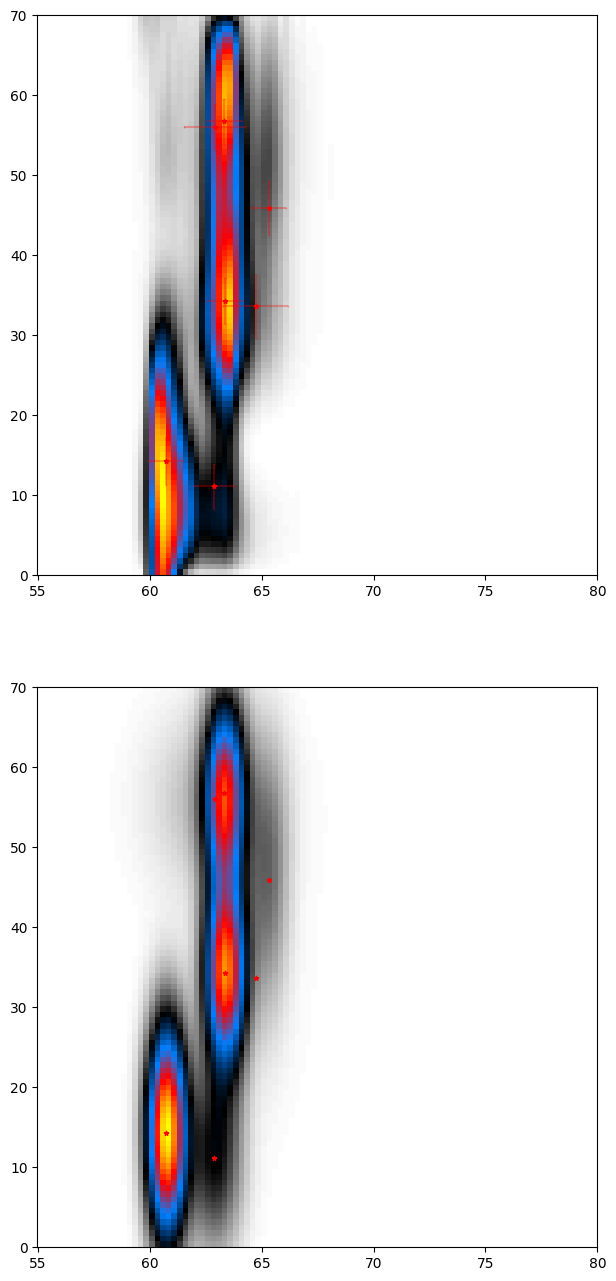

In [9]:
import pomegranate
from pomegranate import GeneralMixtureModel, MultivariateGaussianDistribution, IndependentComponentsDistribution, NormalDistribution
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class MinStdNormalDistributionX(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] =  0.6 #0.1 #0.8 #1 #2#0.6
        NormalDistribution.__init__(self, *args, **kw)
class MinStdNormalDistributionY(NormalDistribution):
    def __init__(self, *args, **kw):
        kw['min_std'] = 8 #8 #1 #5#11 ##stick w 10
        NormalDistribution.__init__(self, *args, **kw)

test_n_components = [7]

fig1, axarr = plt.subplots(2, len(test_n_components), squeeze=False)
fig1.set_size_inches(16,16)

gmmlist = [] #objects for 3,4,5 components
for i, n_comp in enumerate(test_n_components):
 
    gmm = GeneralMixtureModel.from_samples([MinStdNormalDistributionX, MinStdNormalDistributionY],
                                         n_comp, smoothxycoords, smooth_intensities, n_init=10, max_kmeans_iterations=50, 
                                          stop_threshold=0.1, lr_decay=0.5, verbose=True)
    gmmlist.append(gmm)
    df = (5 * n_comp) - 1
    lp = (gmm.log_probability(smoothxycoords) * smooth_intensities).sum() #sum, as in log space, normally porbs would multiply. 
    bic = float(df * np.log(len(smoothxycoords)) - 2.0 * lp) # For evaluating best n_comp
    
    # For independent x,y normals
    comp_params = [comp.parameters[0] for comp in gmm.distributions] # Selects IndependentComponentsDistribution for each Gaussian
    x_params = [cp[0].parameters for cp in comp_params] # NormalDistribution for X : Mean, Var pairs
    y_params = [cp[1].parameters for cp in comp_params] # NormalDistribution for Y : Mean, Var pairs
  
    x_vals_mean, x_vals_var = zip(*x_params) 
    y_vals_mean, y_vals_var = zip(*y_params) 
    
  # Sqrt for Var to Std
    x_vals_std = np.sqrt(x_vals_var)
    y_vals_std = np.sqrt(y_vals_var)

    print(y_vals_mean)

    ax1 = axarr[0,i] #
    ax1.set_xlim(X_min, X_max)
    ax1.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax1.imshow(Intens2d_plot, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax1.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    ax1.errorbar(x_vals_mean, y_vals_mean, y_vals_std, x_vals_std, fmt='none',
               color='red',alpha=0.3,  label='StdDevs', capsize=0.5)


    #xgap = (max(x_smootharrT_coords) - min(x_smootharrT_coords))/10 
    #x_grange = (min(x_smootharrT_coords)-xgap, max(x_smootharrT_coords)+xgap) 
    #n_grid = 100
    x_points = X2d_plot # np.linspace(X_min, X_max, n_grid) 
    y_points = Y2d_plot # np.linspace(Y_min, Y_max, n_grid)
    
    x_grid, y_grid = np.meshgrid(x_points, y_points) # n_grid , n_grid of smoothxycoords
    x_grid_flat = x_grid.ravel()  # Flatten to list
    y_grid_flat = y_grid.ravel() 
    stacked_points = np.stack([x_grid_flat, y_grid_flat], axis=1) # to get x,y pairs

    density = gmmlist[i].log_probability(stacked_points) # comes as log probabilties
    density = np.exp(density) # Real probs
    density_2d = density.reshape([len(x_points), len(y_points)]) # Restore points grid (of heights)

    ax2 = axarr[1,i]
    ax2.set_xlim(X_min, X_max)
    ax2.set_ylim(Y_min, Y_max)
    aspect = (X_max - X_min)/(Y_max - Y_min)
    ax2.imshow(density_2d, cmap=density_colormap, origin='lower', extent=(X_min, X_max, Y_min, Y_max), aspect=aspect) 
    ax2.scatter(x_vals_mean, y_vals_mean, s=10, c='red', marker='*', label='Means')
    
plt.show() 